<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#adding-the-continents:" data-toc-modified-id="adding-the-continents:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>adding the continents:</a></span></li><li><span><a href="#Explore-the-number-of-death-and-magnitude-per-continent:" data-toc-modified-id="Explore-the-number-of-death-and-magnitude-per-continent:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explore the number of death and magnitude per continent:</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [3]:
world_earthquake = pd.read_csv('../data/world_earthquakes_06_clean.csv')
world_earthquake.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths
0,1900-05-11 17:23:00,1900,5,11,17:23:00,Japan,38.7,141.1,5.0,7.0,NaN,0
1,1900-07-12 06:25:00,1900,7,12,06:25:00,Turkey,40.3,43.1,NaN,5.9,NaN,140
2,1900-10-29 09:11:00,1900,10,29,09:11:00,Venezuela,11.0,-66.0,0.0,7.7,NaN,0
3,1901-02-15 00:00:00,1901,2,15,00:00:00,China,26.0,100.1,0.0,6.5,NaN,0
4,1901-03-31 07:11:00,1901,3,31,07:11:00,Bulgaria,43.4,28.7,NaN,6.4,NaN,4


## adding the continents:

In [5]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [6]:
# rename columns to be able to merge them to world_earthquake
continents = continents.rename(columns = {"Continent" : "continent", "Country" : "country"})

In [7]:
world_earthquake = pd.merge(left = world_earthquake, right = continents)

In [8]:
world_earthquake.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
0,1900-05-11 17:23:00,1900,5,11,17:23:00,Japan,38.7,141.1,5.0,7.0,NaN,0,Asia
1,1901-08-09 09:23:00,1901,8,9,09:23:00,Japan,40.5,142.5,35.0,7.2,tsunami,0,Asia
2,1902-01-30 14:01:00,1902,1,30,14:01:00,Japan,40.5,141.3,35.0,6.9,NaN,1,Asia
3,1905-06-02 05:39:00,1905,6,2,05:39:00,Japan,34.1,132.5,55.0,7.0,NaN,11,Asia
4,1909-08-14 06:31:00,1909,8,14,06:31:00,Japan,35.4,136.3,5.0,6.7,NaN,41,Asia


## Explore the number of death and magnitude per continent:

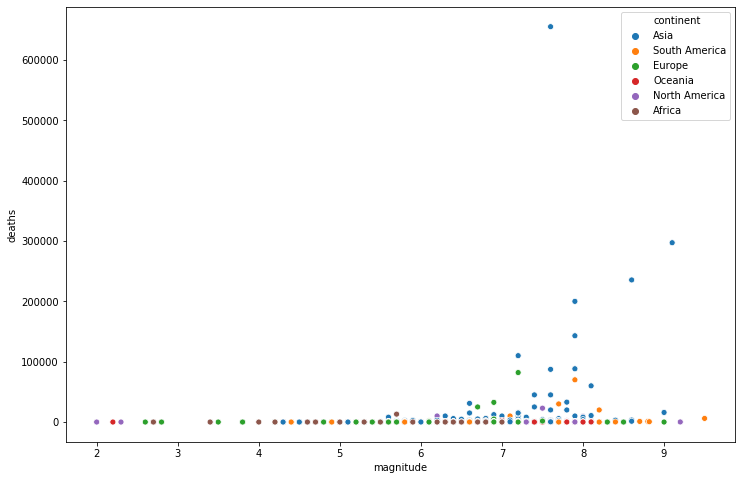

In [21]:
plt.figure(figsize = (12,8))
sns.scatterplot(data=world_earthquake, x="magnitude", y="deaths", hue="continent");

In [23]:
world_earthquake[(world_earthquake.deaths > 600000)]

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
266,1976-07-27 19:42:00,1976,7,27,19:42:00,China,39.605,117.888,16.7,7.6,NaN,655237,Asia


In [26]:
world_earthquake[(world_earthquake.deaths > 10000)]

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
14,1923-09-01 02:58:00,1923,9,1,02:58:00,Japan,35.405,139.084,35.0,7.9,"tsunami, fire",143000,Asia
80,2011-03-11 14:46:00,2011,3,11,14:46:00,Japan,38.322,142.369,24.4,9.0,tsunami,15894,Asia
98,1939-12-26 23:57:00,1939,12,26,23:57:00,Turkey,39.770,39.533,35.0,7.8,NaN,32968,Asia
152,1999-08-17 00:01:00,1999,8,17,00:01:00,Turkey,40.773,30.003,13.3,7.6,NaN,45000,Asia
202,1920-12-16 12:05:00,1920,12,16,12:05:00,China,36.601,105.317,25.0,8.6,NaN,235502,Asia
207,1927-05-22 22:32:00,1927,5,22,22:32:00,China,37.386,102.311,25.0,7.9,NaN,200000,Asia
252,1970-01-04 17:00:00,1970,1,4,17:00:00,China,24.147,102.462,14.0,7.2,NaN,15621,Asia
266,1976-07-27 19:42:00,1976,7,27,19:42:00,China,39.605,117.888,16.7,7.6,NaN,655237,Asia
346,2008-05-12 06:28:00,2008,5,12,06:28:00,China,31.002,103.322,19.0,7.9,landslide,88287,Asia
376,1976-02-04 09:01:00,1976,2,4,09:01:00,Guatemala,15.296,-89.145,12.3,7.5,tsunami,23000,North America


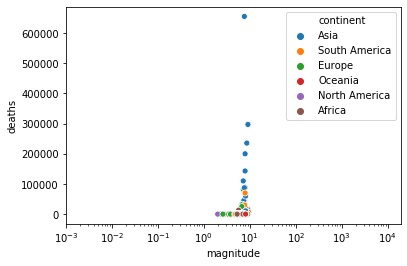

In [14]:
#Get the log 
plt.xscale('log')
sns.scatterplot(data = world_earthquake, x = 'magnitude', y = 'deaths', hue = 'continent');

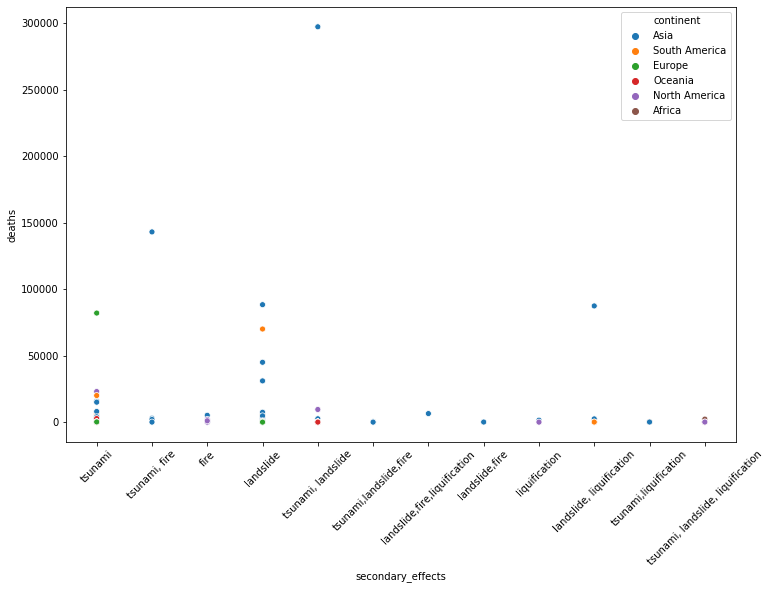

In [20]:
plt.figure(figsize = (12,8))
sns.scatterplot(data=world_earthquake, x="secondary_effects", y="deaths", hue="continent")
plt.xticks(rotation = 45);